# Fundamentos de la Programación (Grado en Ingeniería de la Salud)
## Ejercicio "Óscar" (8 de septiembre de 2020)

Antes de empezar, ejecutaremos la siguiente celda con las importaciones necesarias para poder realizar el ejercicio:

In [1]:
import csv
from datetime import datetime
from matplotlib import pyplot as plt
from collections import namedtuple, Counter

## 1. Carga de datos (0.5 puntos)

Tomaremos la información de un fichero de entrada llamado <code>premios_oscar.csv</code> en el que se encuentran registrados datos de los premios Óscar desde 1927 hasta 2015. El fichero se encuentra en la carpeta <code>./data/</code>. Cada línea del fichero de entrada contiene las siguientes informaciones:

- **Year:** año en el que se hace entrega del premio. Algunos registros pueden tener dos años (por ejemplo 1927/1928) en esos casos nos quedaremos solo con el primero de ellos.
- **Ceremony:** número de orden de la correspondiente ceremonia. La de 1927/1928 fue la primera, y la de 2015 fue la número 88.
- **Award:** categoría del premio.
- **Name:** nombre del premiado. Pueden ser actores, directores, productores, películas, etc.
- **Film:** nombre de la película asociada al premio. Cuando el premio se da directamente a la película (aparece en la columna <code>Name</code>), este campo se aprovecha para incluir otras informaciones.

He aquí un fragmento con las primeras líneas del fichero de entrada:

<img src="./img/datos.png" alt="Drawing" style="width:14cm;"/>

La primera función que implementaremos será la de lectura. Será la encargada de leer los datos del fichero de entrada y cargarlos en una lista de tuplas:

In [2]:
Premio = namedtuple('Premio', 'año ceremonia categoria premiado pelicula')

def lee_premios(fichero):
    ''' Lee el fichero de entrada y devuelve una lista de registros.
    
    Los años deben convertirse a números enteros. En el caso de años compuestos (como '1927/1928')
    se obtendrá el número entero correspondiente al primero de los años.
    
    ENTRADA:
       - fichero: nombre del fichero de entrada
    SALIDA:
       - lista de registros -> [Premio(int, int, str, str, str)]
    '''
    registros = []
    with open(fichero, 'r', encoding='utf-8') as f:
        lector = csv.reader(f)
        next(lector)
        registros = [Premio(int(año.split('/')[0]), int(ceremonia), categoria, premiado, pelicula)
                    for año, ceremonia, categoria, premiado, pelicula in lector]
    return registros

In [3]:
# TEST de 'lee_premios', la salida esperada es:
#   2016 
#   [Premio(año=1927, ceremonia=1, categoria='Actor', premiado='Emil Jannings', pelicula='The Last Command'), 
#    Premio(año=1927, ceremonia=1, categoria='Actress', premiado='Janet Gaynor', pelicula='7th Heaven'), 
#    Premio(año=1927, ceremonia=1, categoria='Art Direction', premiado='William Cameron Menzies', pelicula='The Dove; Tempest'), 
#    Premio(año=1927, ceremonia=1, categoria='Cinematography', premiado='Charles Rosher', pelicula='Sunrise'), 
#    Premio(año=1927, ceremonia=1, categoria='Cinematography', premiado='Karl Struss', pelicula='Sunrise')]
REGISTROS = lee_premios('./data/premios_oscar.csv')
print(len(REGISTROS))
print(REGISTROS[:5])

2016
[Premio(año=1927, ceremonia=1, categoria='Actor', premiado='Emil Jannings', pelicula='The Last Command'), Premio(año=1927, ceremonia=1, categoria='Actress', premiado='Janet Gaynor', pelicula='7th Heaven'), Premio(año=1927, ceremonia=1, categoria='Art Direction', premiado='William Cameron Menzies', pelicula='The Dove; Tempest'), Premio(año=1927, ceremonia=1, categoria='Cinematography', premiado='Charles Rosher', pelicula='Sunrise'), Premio(año=1927, ceremonia=1, categoria='Cinematography', premiado='Karl Struss', pelicula='Sunrise')]


## 2. Consulta y filtrado (7.5 puntos)

Una vez que hemos cargado los datos en una estructura en memoria ya podemos empezar a procesarlos. En esta sección implementaremos algunas funciones de consulta y filtrado que nos permitirán trabajar con ellos.

La primera función se llama <code>calcula_categorias</code> y obtiene el conjunto de las distintas categorías de premios que se han dado a lo largo de todas las ediciones.

In [4]:
def calcula_categorias(registros):
    ''' Categorías distintas a lo largo de la historia de los premios
    
    ENTRADA:
       - registros: lista de registros ->  [Premio(int, int, str, str, str)]
    SALIDA:
       - Conjunto de categorías -> {str}
    '''
    return {r.categoria for r in registros}

In [5]:
# TEST de 'calcula_categorias', la salida esperada es:
#   105
#   ['Actor', 'Actor in a Leading Role', 'Actor in a Supporting Role', 'Actress', 'Actress in a Leading Role']

print(len(calcula_categorias(REGISTROS)))
print(sorted(list(calcula_categorias(REGISTROS)))[:5])

105
['Actor', 'Actor in a Leading Role', 'Actor in a Supporting Role', 'Actress', 'Actress in a Leading Role']


La siguiente función es <code>calcula_peliculas_super_premiadas</code>. La función toma una lista de registros y obtiene el conjunto de películas que han obtenido premios individuales y también globales. Aparecen, por tanto, en la columna <code>premiado</code> y también en la columna <code>pelicula</code>.

In [6]:
def calcula_peliculas_super_premiadas(registros):
    ''' Películas que han obtenido premios individuales (aparecen en la columna 'pelicula') y también 
    globales (aparecen en la columna 'premiado')
    
    ENTRADA:
       - registros: lista de registros ->  [Premio(int, int, str, str, str)]
    SALIDA:
       - Conjunto de películas que han obtenido ambos tipos de premios -> {str}
    '''
    individuales = {r.pelicula for r in registros}
    globales = {r.premiado for r in registros}
    return individuales & globales

In [7]:
# TEST de 'calcula_peliculas_super_premiadas', la salida esperada es:
#   154
#   ['12 Years a Slave', 'A Beautiful Mind', 'A Double Life', 'A Man for All Seasons', 'A Passage to India']
print(len(calcula_peliculas_super_premiadas(REGISTROS)))
print(sorted(list(calcula_peliculas_super_premiadas(REGISTROS)))[:5])

154
['12 Years a Slave', 'A Beautiful Mind', 'A Double Life', 'A Man for All Seasons', 'A Passage to India']


La siguiente función que implementarremos es <code>filtro_generico</code>. Esta función toma una lista de registros y devuelve una selección de registros que cumplen el criterio recibido como parámetro.

In [8]:
def filtro_generico(registros, criterio):
    ''' Selección de registros que cumplen un determinado criterio
    
    ENTRADA:
       - registros: lista de registros ->  [Premio(int, int, str, str, str)]
       - criterio: nombre de función, o expresión lambda -> function
    SALIDA:
       - registros que cumplen el criterio ->  [Premio(int, int, str, str, str)]
    '''
    return [r for r in registros if criterio(r)]

In [9]:
### EJERCICIO: implementar tres llamadas de TEST de 'filtro_generico' que obtengan:
#  - El número de registros en los que aparezca la palabra 'love' (en mayúsculas o minúsculas) en la columna 'pelicula'
#  - El número de registros en los que aparezca el nombre 'john' (en mayúsculas o minúsculas) en la columna 'premiado'
#  - El número de registros en los que el año sea múltiplo de 4

# Las salidas esperadas para estas consultas son:
#    3
#    9
#  501

print(len(filtro_generico(REGISTROS, lambda r:'love' in r.pelicula.lower())))
print(len(filtro_generico(REGISTROS, lambda r:'john' in r.premiado.lower())))
print(len(filtro_generico(REGISTROS, lambda r: r.año%4==0)))

3
9
501


La siguiente función es <code>calcula_palmares</code>. Esta función toma una lista de registros y un número de ceremonia, y calcula un diccionario en el que las claves son los premiados en esa ceremonia (aparecen en columnas <code>premiado</code> o <code>pelicula</code>), y los valores reflejan el número de veces que han sido premiados.

In [10]:
def calcula_palmares(registros, ceremonia):
    ''' Cálculo del número de premios que ha recibido cada premiado
    
    ENTRADA:
       - registros: lista de registros ->  [Premio(int, int, str, str, str)]
       - ceremonia: número de la ceremonia para la que se calcula el palmarés -> int
    SALIDA:
       - diccionario con el número de premios de cada premiado ->  {str:int}
    '''
    registros_ceremonia = [r for r in registros if r.ceremonia==ceremonia]
    premiados = [r.premiado for r in registros_ceremonia]
    peliculas = [r.pelicula for r in registros_ceremonia]
    palmares = dict(Counter(premiados+peliculas))
    return palmares

In [11]:
# TEST de 'calcula_palmares', la salida esperada es:
#   {'Emil Jannings': 1,
#    'Janet Gaynor': 1,
#    'William Cameron Menzies': 1,
#    'Charles Rosher': 1,
#    'Karl Struss': 1,
#    'Lewis Milestone': 1,
#    'Frank Borzage': 1,
#    'Roy Pomeroy': 1,
#    'Paramount Famous Lasky': 1,
#    'Fox': 1,
#    'Benjamin Glazer': 1,
#    'Ben Hecht': 1,
#    'Warner Brothers': 1,
#    'Charles Chaplin': 1,
#    'The Last Command': 1,
#    '7th Heaven': 3,
#    'The Dove; Tempest': 1,
#    'Sunrise': 3,
#    'Two Arabian Knights': 1,
#    'Wings': 2,
#    'Underworld': 1,
#    'The Jazz Singer': 1,
#    'The Circus': 1}
calcula_palmares(REGISTROS, 1)

{'Emil Jannings': 1,
 'Janet Gaynor': 1,
 'William Cameron Menzies': 1,
 'Charles Rosher': 1,
 'Karl Struss': 1,
 'Lewis Milestone': 1,
 'Frank Borzage': 1,
 'Roy Pomeroy': 1,
 'Paramount Famous Lasky': 1,
 'Fox': 1,
 'Benjamin Glazer': 1,
 'Ben Hecht': 1,
 'Warner Brothers': 1,
 'Charles Chaplin': 1,
 'The Last Command': 1,
 '7th Heaven': 3,
 'The Dove; Tempest': 1,
 'Sunrise': 3,
 'Two Arabian Knights': 1,
 'Wings': 2,
 'Underworld': 1,
 'The Jazz Singer': 1,
 'The Circus': 1}

## 3. Visualización (2 puntos)

La función de visualización que implementaremos será <code>muestra_triunfadores</code>. Toma como entrada una lista de registros, y muestra una curva con la evolución del número de premios del triunfador de cada edición. Este número se calculará con el máximo de los valores del diccionario obtenido con la función <code>calcula_palmares</code> para cada ceremonia. 

In [14]:
def muestra_triunfadores(registros):
    ''' Genera una curva con la evolución del número de premios obtenidos por el triunfador de cada ceremonia
    
    ENTRADA:
        - registros: lista de registros ->  [Premio(int, int, str, str, str)]
    SALIDA EN PANTALLA:
        - curva con las ceremonias en el eje 'X', y el número de premios en el eje 'Y'
           
    Se usarán las siguientes instrucciones matplotlib para generar la gráfica:
        plt.plot(ceremonias, premios_triunfadores)
        plt.show()
            
    Donde las dos variables usadas significan lo siguiente:
        - ceremonias: lista con el número de cada ceremonia ordenada de menor a mayor
        - premios_triunfadores: lista (alineada con la anterior) con el número de premios del triunfador de cada ceremonia
    '''
    ceremonias = sorted(list({r.ceremonia for r in registros}))
    premios_triunfadores = [max(calcula_palmares(registros, ceremonia).values()) for ceremonia in ceremonias]

    plt.plot(ceremonias, premios_triunfadores)
    plt.show()

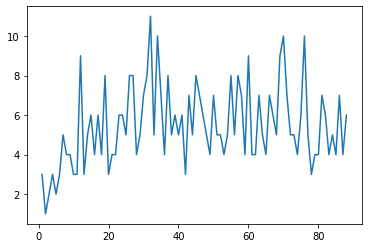

In [13]:
# TEST de 'muestra_triunfadores'
muestra_triunfadores(REGISTROS)

La salida de la celda de test anterior debería ser la siguiente:

<img src="./img/test.png" alt="Drawing" style="width:8cm;"/> 